# MSc in Data Science, AUEB
# Numerical Optimization and Large Scale Linear Algebra, Assignment 2
## Vasileios Ilias Drouzas
## Student ID: f3352301

A set of $n$ lamps illuminates an area that we divide into $m$ regions (pixels). We let $l_{i}$ denote the lighting level in region $i$, so the $m$-vector $l$ gives the illumination levels across all regions. We let $p_{i}$ denote the power at which lamp $i$ operates, so the $n$-vector $p$ gives the set of lamp powers. The vector of illumination levels is a linear function of the lamp powers, so we have $l=Ap$ for some $m \times n$ matrix $A$. The $j$th column of $A$ gives the illumination pattern for lamp $j$, i.e., the illumination when lamp $j$ has power $1$ and all other lamps are off. We will assume that $A$ has linearly independent columns (and therefore is tall). The $i$th row of $A$ gives the sensitivity of pixel $i$ to the $n$ lamp powers. Your mission is to find lamp powers that result in a desired illumination pattern $l^{des}$, such as $l^{des}=a·1$, ($1$ the vector with all ones) which is uniform illumination with value across the area. In other words, we seek $p$ so that $Ap≈l^{des}$. We can use least squares to find $\hat{p}$ that minimizes the sum square deviation from the desired illumination, $\|Ap-l^{des}\|_{2}^{2}$. As an example use $n=10$ lamps, the area being an $25\times25$ grid with $m=625$ pixels, each $1m^{2}$. The $(x,y)$ positions of lamps and their heigh above floor are:

<p style='text-align: center;'>$\{(4.1, 20.4, 4), (14.1, 21.3, 3.5), (22.6, 17.1, 6), (5.5, 12.3, 4), (12.2, 9.7, 4)\}$</p>
<p style='text-align: center;'>$\{(15.3, 13.8, 6), (21.3, 10.5, 5.5), (3.9, 3.3, 5), (13.1, 4.3, 5), (20.3, 4.2, 4.5)\}$</p>

The illumination decays with an inverse square law, so $A_{ij}$ proportional to $d^{-2}_{ij}$, where $d_{ij}$ is the $(3-D)$ distance between the center of the pixel and the lamp position. The matrix $A$ is scaled so that when all lamps have power one, the average illumination level is one. The desired illumination pattern is $1$, i.e., uniform with value $1$.


### 1. Using colormap, create two graphs to show the illumination of the two patterns: The first with all lamps set to 1 and the other that minimize the sum square deviation with a desired uniform illumination. Which are the Root Mean Squared (RMS) errors in both cases?


First we will define the lamp positions and the tables:

In [1]:
import numpy as np
np.random.seed(1)                             #Set seed

In [2]:
#define lamp positions
lamp_pos = [(4.1, 20.4, 4), (14.1, 21.3, 3.5), (22.6, 17.1, 6), (5.5, 12.3, 4), (12.2, 9.7, 4),
(15.3, 13.8, 6), (21.3, 10.5, 5.5), (3.9, 3.3, 5), (13.1, 4.3, 5), (20.3, 4.2, 4.5)]                   #lamp positions

In [3]:
lamp_pos = np.array(lamp_pos)                   #convert to numpy array
print("Lamp positions: \n", lamp_pos)

Lamp positions: 
 [[ 4.1 20.4  4. ]
 [14.1 21.3  3.5]
 [22.6 17.1  6. ]
 [ 5.5 12.3  4. ]
 [12.2  9.7  4. ]
 [15.3 13.8  6. ]
 [21.3 10.5  5.5]
 [ 3.9  3.3  5. ]
 [13.1  4.3  5. ]
 [20.3  4.2  4.5]]


In [4]:
#define A table
A = np.zeros((625,10))
for i in range(25):
    for j in range(25):
        for a, k in enumerate(lamp_pos):
            position = np.array([i + 0.5, j + 0.5, 0])
            distance = np.linalg.norm(position - lamp_pos[a])
            A[i * 25 + j, a] = distance ** -2               #inverse square law


print("                                Matrix A:")
print("---------------------------------------------------------------------------------------")
print(A)
print("\nShape of matrix A:", A.shape)

                                Matrix A:
---------------------------------------------------------------------------------------
[[0.00235311 0.00158768 0.00125005 ... 0.02252252 0.00504541 0.00234753]
 [0.00258953 0.00169707 0.00130247 ... 0.02512563 0.00521921 0.00238334]
 [0.00286229 0.00181604 0.0013558  ... 0.02688172 0.00534759 0.00240859]
 ...
 [0.00229058 0.00820681 0.01454122 ... 0.00122249 0.00205677 0.00268255]
 [0.00226362 0.00798403 0.01241157 ... 0.00116632 0.00190985 0.00243677]
 [0.00222732 0.00765404 0.01059659 ... 0.00111259 0.0017762  0.00222232]]

Shape of matrix A: (625, 10)


In [5]:
#define p and ldes
p = np.ones((10,1))
l_des = np.ones((625,1))
area_size = (25,25)


In [6]:
illumination_level = np.dot(A, p)                #illumination level matrix

A_scaled = A * (1/illumination_level.mean())       #scale A
illumination_level = np.dot(A_scaled,p)            #calculate illumation matrix again

### First case: Illumination pattern with all lamps set to one.

In [7]:
p_ls = np.linalg.lstsq(A_scaled, l_des, rcond=None)[0]              #Least squares method
p_ls.flatten()

array([1.46211018, 0.78797433, 2.96641047, 0.74358042, 0.08317333,
       0.21263945, 0.21218408, 2.05114815, 0.90760315, 1.47222464])

In [8]:
RMS1 = np.sqrt(np.mean((illumination_level - l_des) ** 2))
print("Root mean Squared Error (RMSE): ", round(RMS1, 2))

Root mean Squared Error (RMSE):  0.24


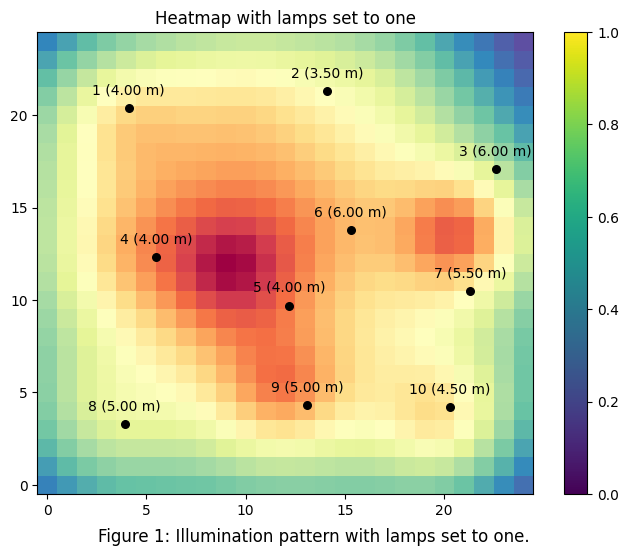

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

region = np.reshape(illumination_level, area_size)
plt.figure(figsize=(8, 6))
plt.title("Heatmap with lamps set to one")
plt.imshow(region, cmap='Spectral_r', origin='lower', aspect='auto')
plt.scatter(np.asarray(lamp_pos)[:, 0], np.asarray(lamp_pos)[:, 1], s=30, c='black')
for idx, (pos, height) in enumerate(zip(lamp_pos, np.asarray(lamp_pos)[:, 2])):
    plt.annotate(f'{idx+1} ({height:.2f} m)', (pos[0], pos[1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.colorbar()
txt="Figure 1: Illumination pattern with lamps set to one."
plt.figtext(0.47, 0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Second case: Illumination pattern that minimizes the sum squares deviation with illumination of one.

In [10]:
illumination_level_optimized = np.dot(A_scaled, p_ls)
RMS2 = np.sqrt(np.mean((illumination_level_optimized - l_des) ** 2))
print("Root mean Squared Error (RMSE): ", round(RMS2, 2))

Root mean Squared Error (RMSE):  0.14


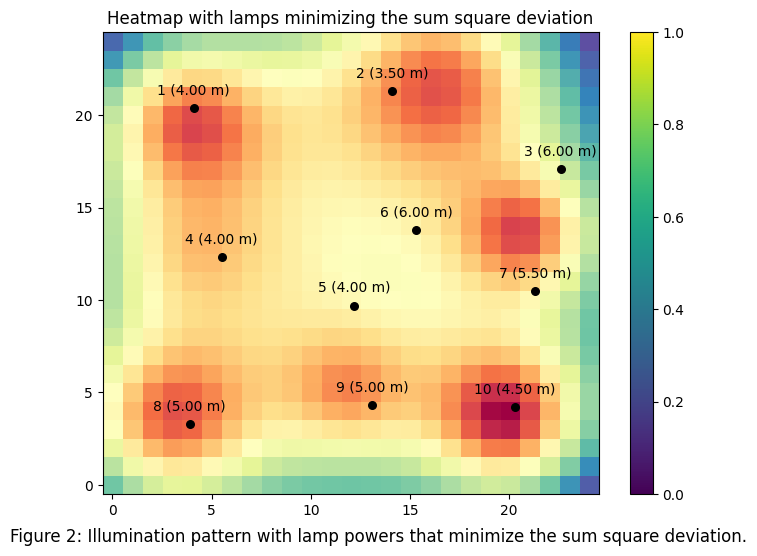

In [11]:
#Heatmap
region2 = np.reshape(illumination_level_optimized, area_size)
plt.figure(figsize=(8, 6))
plt.title("Heatmap with lamps minimizing the sum square deviation")
plt.imshow(region2, cmap='Spectral_r', origin='lower', aspect='auto')
plt.scatter(np.asarray(lamp_pos)[:, 0], np.asarray(lamp_pos)[:, 1], s=30, c='black')
for idx, (pos, height) in enumerate(zip(lamp_pos, np.asarray(lamp_pos)[:, 2])):
    plt.annotate(f'{idx+1} ({height:.2f} m)', (pos[0], pos[1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.colorbar()
txt="Figure 2: Illumination pattern with lamp powers that minimize the sum square deviation."
plt.figtext(0.47, 0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

This illumination pattern seems closer to uniform.

### 2. Create the histogram of patch illumination values for all lamp powers one, and for lamp powers found by LS. Explain the results.

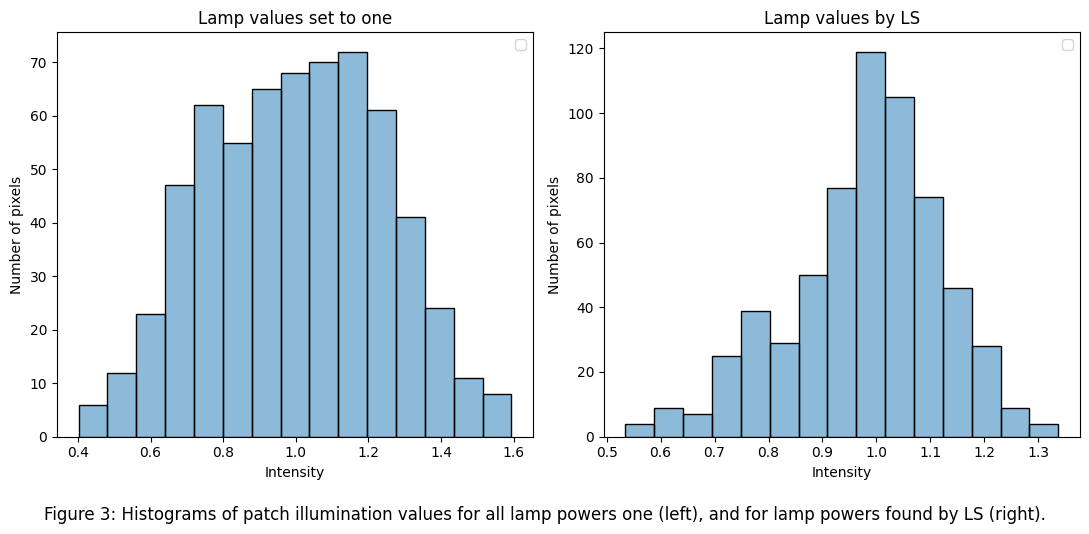

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

sns.histplot(illumination_level, ax=ax[0], bins = 15)
ax[0].set_title('Lamp values set to one')
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].legend([])


sns.histplot(illumination_level_optimized, ax=ax[1], bins = 15)
ax[1].set_title('Lamp values by LS')
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].legend([])

txt="Figure 3: Histograms of patch illumination values for all lamp powers one (left), and for lamp powers found by LS (right)."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

 In the case where the lamp powers are found by LS, we notice that the power intensity is higher.






## 3. The above choice of points for the lamps was made in such a way to ensure positivity in the corresponding power of the lamps. Now you have to add an extra constraint. The total energy consumption of the lamps will be equal 10 and non of them could be negative. Find the new power distribution of the lamps in order to ensure the least square (under constraints) optimality.


In [13]:
from scipy.optimize import minimize

mse3 =  lambda p: np.sum((np.dot(A_scaled, p) - l_des) ** 2)        #mean squared error

def constraint(p):
    return np.sum(p) - 10              #total energy should be equal to 10


p0 = np.ones(10)     #initial guess


bounds = [(0, None)] * 10        #non-negative bounds


cons = {'type': 'eq', 'fun': constraint}    #constraint


res = minimize(mse3, p0, method='SLSQP', bounds=bounds, constraints=cons)         #optimize


p_ls_constrained = res.x                 #optimized lamp powers

illumination_level_optimized = np.dot(A_scaled, p_ls_constrained)
RMS_constrained = np.sqrt(np.mean((illumination_level_optimized - l_des) ** 2))
print("Root mean Squared Error (RMSE) with constraint: ", round(RMS_constrained, 2))
print("\nOptimized lamp powers with constraint:\n", p_ls_constrained)

Root mean Squared Error (RMSE) with constraint:  0.16

Optimized lamp powers with constraint:
 [1.33953159e+00 8.94268010e-01 2.36804439e+00 7.79204363e-01
 3.18876051e-01 2.57800764e-11 3.95141125e-01 1.76365325e+00
 7.60417263e-01 1.38086395e+00]


## 4. Challenge. Try to find, new points for the lamps to beat the RMS error of the first question. The lamps can be in any height between 4 and 6 meters and of course inside the area. Again, the total energy of the lamps should be 10 and non of them should be negative. Run different -randomchoices of positions until you find a better solution. For this choice of points, create present the colormap picture of the illumination as well as the histogram of the intensities of the pixels of the area.

First, we will define a func *compute_rms_error()* which will compute the RMSE.

In [14]:
def compute_rms_error(illumination_levels, l_des):                              #compute RMS error
    return np.sqrt(np.mean((illumination_levels - l_des) ** 2))

Then, we will define a func *optimize_lamp_powers()*, which will actually perform the same operations as we did before (minimizing the RMSE with constraints).

In [15]:
def optimize_lamp_powers(A_scaled, l_des):                                      #optimize lamp powers (automate the previous process)
    p0 = np.ones(10)
    bounds = [(0, None)] * 10
    cons = {'type': 'eq', 'fun': lambda p: np.sum(p) - 10}
    res = minimize(objective, p0, method='SLSQP', bounds=bounds, constraints=cons)
    p_ls_constrained = res.x
    illumination_level_optimized = np.dot(A_scaled, p_ls_constrained)
    return illumination_level_optimized, p_ls_constrained

Moving on, we will create a func to generate random positions for the lamps within the specified area and in height between 4 and 6. Also, we will define the objective function. Minimizing this objective function means finding values for the lamp powers p that result in illumination levels that closely match the desired levels.

In [16]:
def generate_random_lamp_positions(num_lamps, height_range, area_size):            #Generate random positions for the lamps
    lamp_positions = []
    for _ in range(num_lamps):
        x = np.random.uniform(0, area_size[0])
        y = np.random.uniform(0, area_size[1])
        z = np.random.uniform(*height_range)
        lamp_positions.append((x, y, z))
    return np.array(lamp_positions)

def objective(p):
    return np.sum((np.dot(A_scaled, p) - l_des) ** 2)                        #objective function (to be minimized later)


height_range = (4, 6)                                                     #lamp height range

l_des2 = np.ones((625, 1))                                               #desired illumination levels


Now we are ready to start our iterations! We will initialize the variables to None values and we will do 100 iterations with randomly generated lamp positions within the specified range (using the function we defined above) and calculate the new matrix A. After that, we will scale the matrix and we will use the functions we defined above to optimize the lamp powers and compute the new RMSE error.

In [17]:
num_iterations = 100                                                    #number of iterations to be made

best_rms_error = float('inf')                                           #initialize variables
best_lamp_positions = None
best_lamp_powers = None
best_illumination_levels = None

for i in range(num_iterations):

    lamp_positions = generate_random_lamp_positions(10, height_range, area_size)            #generate random lamp positions

    A = np.zeros((625, 10))
    for i in range(25):
        for j in range(25):
            for a, k in enumerate(lamp_positions):
                position = np.array([i + 0.5, j + 0.5, 0])
                distance = np.linalg.norm(position - lamp_positions[a])
                A[i * 25 + j, a] = distance ** -2                                            #Calculate the new matrix A


    illumination_level = np.dot(A, np.ones((10, 1)))
    A_scaled = A * (1 / illumination_level.mean())                                            #scale A

    illumination_levels_optimized, lamp_powers = optimize_lamp_powers(A_scaled, l_des)        #optimize the lamp powers

    rms_error = compute_rms_error(illumination_levels_optimized, l_des)                       #compute RMS error

    if rms_error < best_rms_error:                                                            #update the RMS solution
        best_rms_error = rms_error
        best_lamp_positions = lamp_positions
        best_lamp_powers = lamp_powers
        best_illumination_levels = illumination_levels_optimized


Best RMS Error: 0.12515203131443298

Best Lamp Positions:
[[ 3.58557622  1.9596725   4.03666529]
 [ 1.66812494 11.46459534  4.22668385]
 [ 0.69458372 18.87153703  4.78970096]
 [18.67346239 11.31012067  4.90017349]
 [11.95181267 11.85009816  5.60632668]
 [10.059813   22.61715401  4.0741221 ]
 [19.34685857  3.14103453  5.23702713]
 [ 0.25910653 13.46568206  4.00603591]
 [23.77984464 22.63505084  5.59193388]
 [22.881858    3.63895578  4.31546014]]

Best Lamp Powers:
[1.20783813 0.69473642 1.21668519 0.82022737 1.09625975 0.99488301
 1.25805994 0.         2.17565099 0.5356592 ]




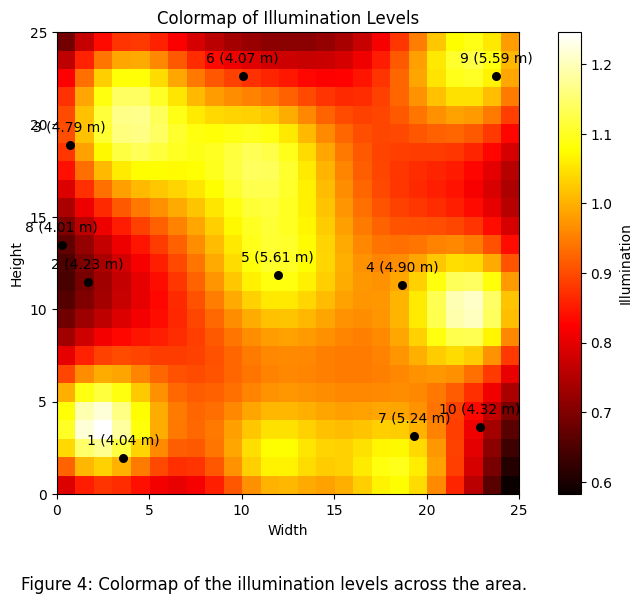

In [18]:
print("Best RMS Error:", best_rms_error)
print("\nBest Lamp Positions:")
print(best_lamp_positions)
print("\nBest Lamp Powers:")
print(best_lamp_powers)

print("\n")

plt.figure(figsize=(10, 6))
plt.imshow(best_illumination_levels.reshape(area_size), cmap='hot', origin='lower', extent=[0, 25, 0, 25])
plt.colorbar(label='Illumination')
plt.title('Colormap of Illumination Levels')
plt.scatter(np.asarray(best_lamp_positions)[:, 0], np.asarray(best_lamp_positions)[:, 1], s=30, c='black')
for idx, (pos, height) in enumerate(zip(best_lamp_positions, np.asarray(best_lamp_positions)[:, 2])):
    plt.annotate(f'{idx+1} ({height:.2f} m)', (pos[0], pos[1]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Width')
plt.ylabel('Height')
txt="Figure 4: Colormap of the illumination levels across the area."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

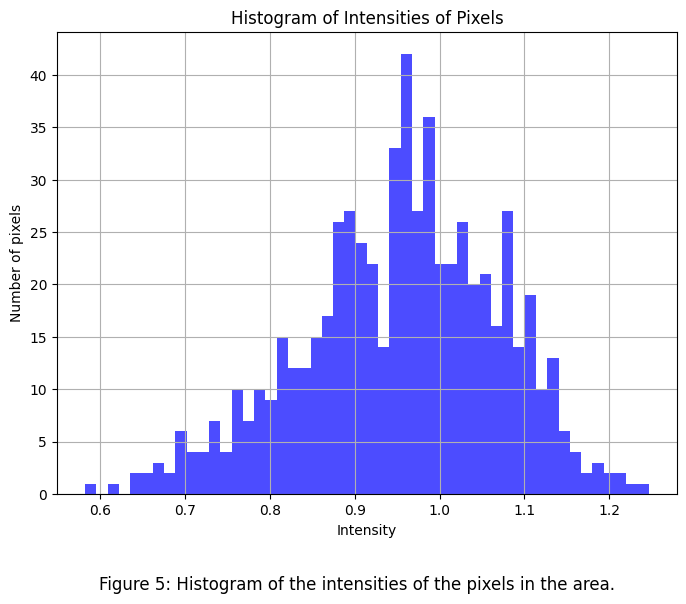

In [19]:
intensities = best_illumination_levels.flatten()                   #new intensities

plt.figure(figsize=(8, 6))
plt.hist(intensities, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Intensities of Pixels')
plt.xlabel('Intensity')
plt.ylabel('Number of pixels')
txt="Figure 5: Histogram of the intensities of the pixels in the area."
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.grid(True)
plt.show()
